In [37]:
import optuna
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from eval_help import *
from combine_results import combine_results
import pandas as pd

In [38]:
[s.study_name for s in optuna.study.get_all_study_summaries(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db")]

['optimize_counterfactuals_full',
 'optimize_counterfactuals_full_lower_range',
 'optimize_counterfactuals_2',
 'optimize_counterfactuals_vgg_distance',
 'optimize_counterfactuals_vgg_distance_real',
 'optimize_counterfactuals_vgg_distance_final',
 'optimize_counterfactuals_resnet',
 'optimize_counterfactuals_initial',
 'optimize_counterfactuals_initial2',
 'optimize_counterfactuals_vandenhende',
 'optimize_counterfactuals_vandenhende2',
 'optimize_counterfactuals_vandenhende3',
 'optimize_counterfactuals_performance_vgg',
 'optimize_counterfactuals_performance_vgg_2',
 'optimize_counterfactuals_initial3',
 'optimize_counterfactuals_performance_vgg_final']

In [39]:
study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_initial2")

In [40]:
# study = optuna.create_study(
#     storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db",
#     study_name="optimize_counterfactuals_resnet",
#     directions=["maximize", "minimize"],
# )
# study = optuna.load_study(storage="sqlite://///store-01.hpi.uni-potsdam.de/fg/doellner/florence.boettger/counterfactuals/optimize_counterfactuals_full.db", study_name="optimize_counterfactuals_resnet")
# study.enqueue_trial(
#     {
#         "lambd2": 10,
#         "max_dist": 0
#     }
# )
# study.enqueue_trial(
#     {
#         "lambd2": 0,
#         "max_dist": 0
#     }
# )

In [41]:
len(study.trials)

405

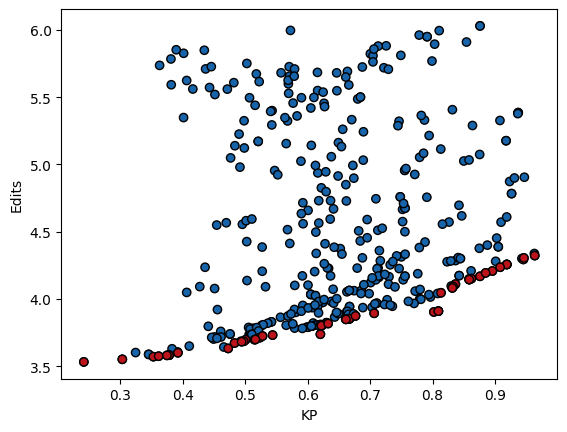

In [42]:
plot_study(study, "initial")

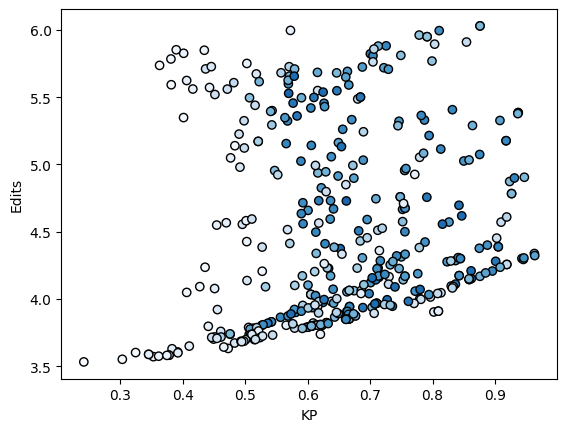

In [43]:
plot_study(study, "initial_lambd2", print_pareto=False, map=lambda t: t.params["lambd2"] / 10)

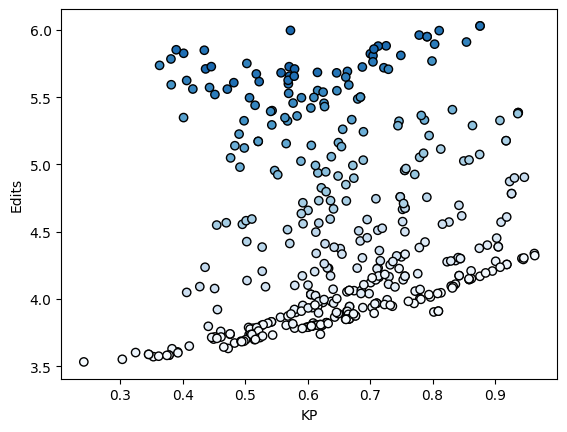

In [44]:
plot_study(study, "initial_lambd", print_pareto=False, map=lambda t: t.params["lambd"] / 2)

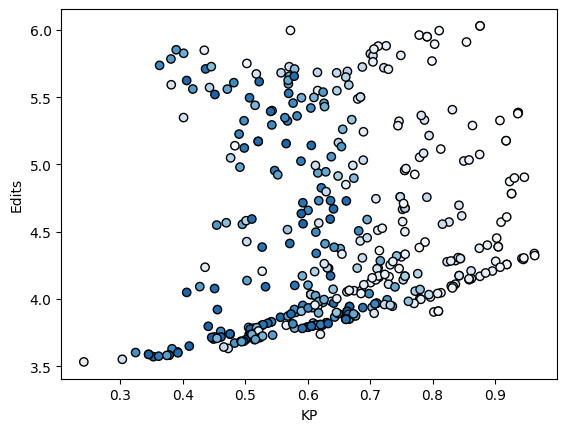

In [45]:
plot_study(study, "initial_max_dist", print_pareto=False, map=lambda t: t.params["max_dist"] / 3)

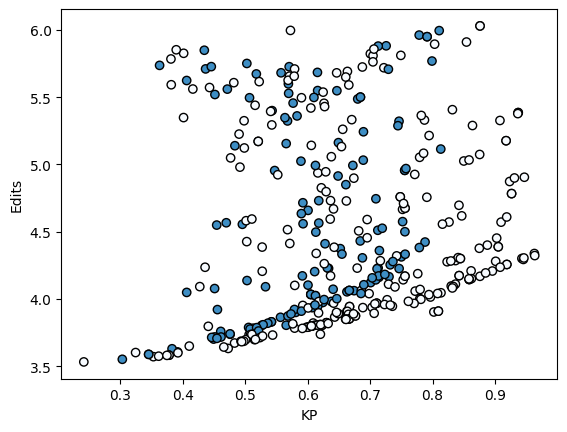

In [46]:
plot_study(study, "initial_parts_type", print_pareto=False, map=lambda t: 0.8 if t.params["parts_type"] == "minimize_head" else 0.0)

In [47]:
np.average([t.params["max_dist"] for t in study.best_trials])

1.2562956240235825

In [48]:
optuna.visualization.plot_pareto_front(study, target_names=["KP", "edits"])

In [49]:
x_names = ["lambd2", "max_dist", "lambd", "parts_type"]
spearman = study_spearman(study, x_names, 2)

In [50]:
for i in range(len(x_names)):
    x_name = x_names[i]
    print(f"{x_name} spearman correlation is: {spearman.correlation[i][len(x_names)]} on KP, {spearman.correlation[i][len(x_names) + 1]} on edits.")
    print(f"{x_name} spearman pvalue is: {spearman.pvalue[i][len(x_names)]} on KP, {spearman.pvalue[i][len(x_names) + 1]} on edits.")

lambd2 spearman correlation is: 0.4742357472870793 on KP, 0.19174729807062132 on edits.
lambd2 spearman pvalue is: 5.454338310238214e-24 on KP, 0.00010735241562307507 on edits.
max_dist spearman correlation is: -0.6811111446140459 on KP, -0.35022713045044984 on edits.
max_dist spearman pvalue is: 3.002024522320977e-56 on KP, 4.5042031567304856e-13 on edits.
lambd spearman correlation is: -0.028989567152043177 on KP, 0.906532270970204 on edits.
lambd spearman pvalue is: 0.5617286469104724 on KP, 2.812572521694198e-152 on edits.
parts_type spearman correlation is: -0.23622071600399716 on KP, 0.08173126810515716 on edits.
parts_type spearman pvalue is: 1.6234993210919484e-06 on KP, 0.10134049899595807 on edits.


In [51]:
results = combine_results("optimize_counterfactuals_initial2")

In [52]:
evaluate_results_spearman(results)

avg_edits Spearman correlation is 1.0, 0.4430711360918987, 0.6016743268723413, -0.014408235823504468, 0.2583484479085123
eval_single_near Spearman correlation is 0.4430711360918987, 0.9999999999999999, 0.8914315508226602, 0.8613910395186506, 0.9069924395277112
eval_single_same Spearman correlation is 0.6016743268723413, 0.8914315508226602, 1.0, 0.661157452097068, 0.8970551957048364
eval_all_near Spearman correlation is -0.014408235823504468, 0.8613910395186506, 0.6611574520970679, 1.0, 0.8880261146700316
eval_all_same Spearman correlation is 0.2583484479085123, 0.9069924395277112, 0.8970551957048364, 0.8880261146700316, 1.0


In [53]:
evaluate_results_average(results)

eval_single_near average is 0.920184593782857
eval_single_same average is 0.7034100964597305
eval_all_near average is 0.8669944934790332
eval_all_same average is 0.6515354920696832


In [54]:
evaluate_results_median(results)

eval_single_near median is 0.9228066198141011
eval_single_same median is 0.703695307186579
eval_all_near median is 0.8780941595211131
eval_all_same median is 0.6423844483507394
